<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/ml_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering with Machine Learning**

# What is Machine Learning (ML)?          TODO

text is missing
.
.
.




[other image](https://www.wordstream.com/wp-content/uploads/2021/07/machine-learning1-1.png)

![](https://uk.mathworks.com/help/stats/machinelearningtypes.jpg)


In the following we are going to focus on the clustering methods.



# **Clustering** 

Clustering or cluster analysis is an unsupervised learning problem. There are many types of clustering algorithm. Most of these use similarity or distance measures between points.
Some of the clustering algorithms require to specify or guess at the number of clusters to discover in the data, whereas others require the specification of some minimum distance between observations in which examples may be considered “close” or “connected.”

Cluster analysis is an iterative process where subjective evaluation of the identified clusters is fed back into changes to algorithm configuration until a desired or appropriate result is achieved.

**There are several clustering algorithm to choose from:** 
- Affinity Propagation
- Agglomerative Clustering
- BIRCH
- DBSCAN
- K-Means
- Mini-Batch K-Means
- Mean Shift
- OPTICS
- Spectral Clustering
- Mixture of Gaussians
- etc...

In the following we are going to check on some of these with the help of **[scikit-learn](https://scikit-learn.org/stable/)** library. 

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

**Let's import the modules!**

In [ ]:
# modules
import sklearn
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot


To test different clustering methods we need a sample data. In the **scikit-learining** module there are built-in functions to create it. We will use *make_classification()* to create a dataset of 1000 points with 2 clusters.  

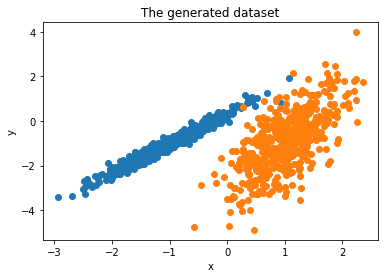

In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1]) 
# show the plot
pyplot.title('The generated dataset')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

Now let's apply the different clustering algorithms on the dataset!

##[Affinity propagation](https://www.science.org/doi/10.1126/science.1136800)

The method takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges.

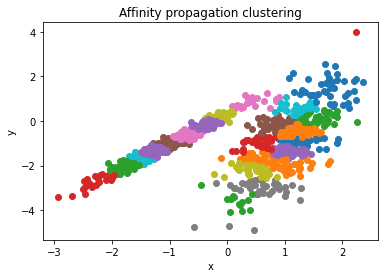

In [ ]:
from sklearn.cluster import AffinityPropagation
from numpy import unique

# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Affinity propagation clustering')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()


##[Agglomerative clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

It is type of [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering), which is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree. The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.


*Agglomerative clustering* performs
using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The merging continues until the desired number of clusters is achieved.

The merge strategy contains the following steps:
- minimizes the sum of squared differences within all clusters
- minimizes the maximum distance between observations of pairs of clusters
- minimizes the average of the distances between all observations of pairs of clusters
- minimizes the distance between the closest observations of pairs of clusters

To use *agglomerative clustering* the *number of clusters* have to be defined.


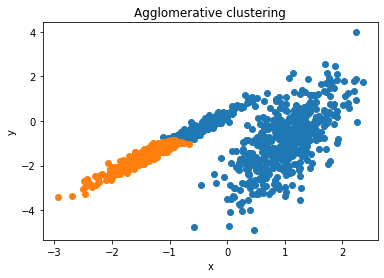

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Agglomerative clustering')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

##[BIRCH](https://dl.acm.org/doi/10.1145/235968.233324)

BIRCH clustering (Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.


BRICH incrementally and dynamically clusters incoming multi-dimensional metric data points to try to produce the best quality clustering with the available resources. This is the first clustering algorothm that handle noise effectively. It is also effective on 
large datasets like point clouds.

To use this method the *threshold* and *number of clusters* values have to be deifned.

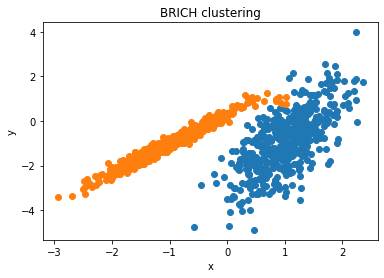

In [ ]:
from sklearn.cluster import Birch

model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('BRICH clustering')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

##[DBSCAN](https://www.osti.gov/biblio/421283)

DBSCAN clustering (Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.


It can be used on large databases with good efficiency. The usage of the DBSCAN is not complicated, it requires only one parameter. The number of clusters are determined by the algorithm.


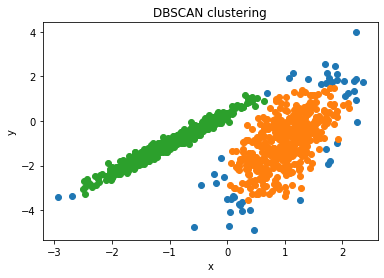

In [ ]:
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('DBSCAN clustering')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

##[k-Means clustering](https://projecteuclid.org/ebooks/berkeley-symposium-on-mathematical-statistics-and-probability/Proceedings%20of%20the%20Fifth%20Berkeley%20Symposium%20on%20Mathematical%20Statistics%20and%20Probability,%20Volume%201:%20Statistics/chapter/Some%20methods%20for%20classification%20and%20analysis%20of%20multivariate%20observations/bsmsp/1200512992)

May be the most widely known clustering method. During the creation of the clusters the algorithm trys to minimize the variance within each cluster.

To use it we have to define the *number of clusters*.


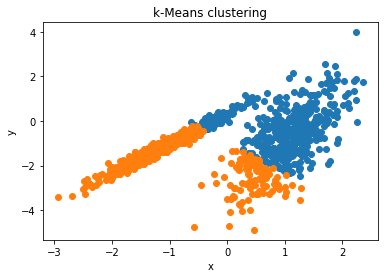

In [ ]:
from sklearn.cluster import KMeans

# define the model
model = KMeans(n_clusters=2)

# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('k-Means clustering')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()


There is a modified version of k-Means, which is called [Mini-Batch K-Means](https://dl.acm.org/doi/10.1145/1772690.1772862) clustering. The difference between the two that updated vesion using mini-batches of samples rather than the entire dataset. It makes faster for large datasets, and more robust to statistical noise. 

##[Mean shift clustering](https://www.computer.org/csdl/journal/tp/2002/05/i0603/13rRUxYrbVE)

The algorithm is finding and adapting centroids based on the density of examples in the feature space.

To apply it we don't have to define any parameters.

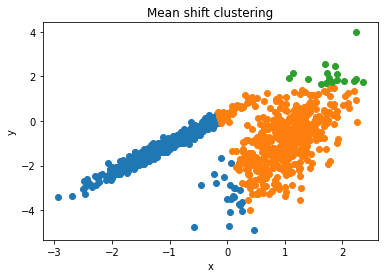

In [ ]:
from sklearn.cluster import MeanShift

# define the model
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Mean shift clustering')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

## The main characteristics of the clustering algorithms

![clustering_methods](https://github.com/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/images/clustering_methods.png?raw=true)



**Task**
 - Test the different clustering algorithms on different datasets!
 - Check and use [scikit-learn's documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) to compare the algorithms! 

# Applying ML based clustering algorithm on point cloud 

The presented culstering method can be useful when we would like to separate group of points in a point cloud. 

Most cases when we would like to apply clustering on a point cloud the number of clusters is unknown, but as we have seen above there are severeal algorithms (like DBSCAN, OPTICS, mean shift) where the number of clusters don't have to be defined.     

Therefore, in the following section we are going to apply one of these, the DBSCAN clustering algorithm to separate roof points of buildings.

**First, let's download the point cloud!**


In [21]:
!wget -q https://github.com/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/code/barnag_roofs.ply

Let's install [Open3D](http://www.open3d.org)!

In [ ]:
!pip install open3d -q

After the installation import modules and display the point cloud!

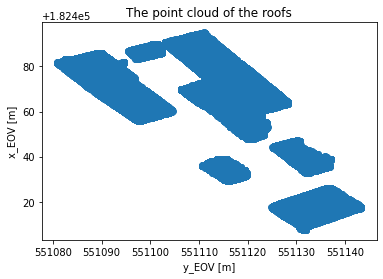

Number of clusters: [-1  0  1  2  3  4  5  6  7  8]


In [1]:
import open3d as o3d
import numpy as np

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

pc = o3d.io.read_point_cloud('barnag_roofs.ply')
xyz = np.asarray(pc.points)

# display the point cloud
pyplot.scatter(xyz[:, 0], xyz[:, 1])
pyplot.title('The point cloud of the roofs')
pyplot.xlabel('y_EOV [m]')
pyplot.ylabel('x_EOV [m]')
pyplot.show()

'''
3d display                            TODO
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xyz[:, 0], xyz[:, 1],xyz[:, 2])
ax.view_init(30, 70)
'''

# define the model
model = DBSCAN(eps=0.30, min_samples=100)

# fit model and predict clusters
yhat = model.fit_predict(xyz)
#print(yhat)

# retrieve unique clusters
clusters = unique(yhat)
print('Number of clusters: '+str(clusters))



Let's use DBSCAN on the imported point cloud. 

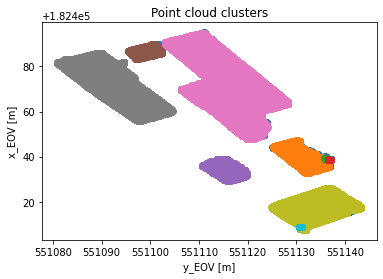

In [20]:
# Save clusters as  
for cluster in clusters:
  # get row indexes for samples with this cluster
  row_ix = where(yhat == cluster)

  # create scatter of these samples
  pyplot.scatter(xyz[row_ix, 0], xyz[row_ix, 1], label=str(i)+' cluster')

  # export the clusters as a point cloud
  xyz_cluster = xyz[row_ix]
  pc_cluster = o3d.geometry.PointCloud()
  pc_cluster.points = o3d.utility.Vector3dVector(xyz_cluster)
  if cluster >= 0:
    o3d.io.write_point_cloud('cluster_' + str(cluster) + '.ply', pc_cluster) # export .ply format
  else:
    o3d.io.write_point_cloud('noise.ply', pc_cluster) # export noise    

# show the plot
pyplot.title('Point cloud clusters')
pyplot.xlabel('y_EOV [m]')
pyplot.ylabel('x_EOV [m]')
pyplot.show()


**Task for practice**
- Use other clustering algorithms on point clouds!
- Compare the built-in Open3D and scikit-learn DBSCAN algorithm!

#Sources
- https://scikit-learn.org/stable/index.html

- https://machinelearningmastery.com/clustering-algorithms-with-python/
